# Reti neurali: polinomio terzo grado

Si provi a costruire un modello di rete neurale al fine di ottenere un fit ragionevole del seguente polinomio di terzo grado:

$$ f(x)=4-3x-2x^2+3x^3 $$
con $x \in [-1,1]$.

In [1]:

#f(x)= ax^3 + bx^2 + cx + d
a= 3
b= -2
c= -3
d= 4


In [2]:

import numpy as np

#input
np.random.seed(0)
ntrain= 5000
nvalid= int(ntrain/10)
x_train= np.random.uniform(-1, 1, ntrain)
x_valid= np.random.uniform(-1, 1, nvalid)
x_valid.sort()

#ideal (target) linear function
y_target= a*x_valid**3 + b*x_valid**2 + c*x_valid + d

sigma= 0.1 #noise
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma)
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)


Si opta per la costruzione di una rete neurale su più coppie di layer.\
In particolare il primo layer di pochi neuroni funge da inizializzatore per una doppia coppia di layer densi interamente connessi 18-6 neuroni. L'attivazione del layer più numeroso avviene secondo una funzione $tanh$, mentre il layer meno numeroso fungerà da sintesi del precedente ed avrà attivazione non limitata di tipo $elu$.\
Si conclude la rete con un layer a singolo neurone per ottenere un output di un singolo valore.

Si opta infine per un ottimizzatore $Adam$ (decisamente più performante di uno $SGD$ testato in precedenza), e una funzione obiettivo (o $Loss \ Function$) tipo $Mean Squared Error$; si tralascia, infine, l'utilizzo di una metrica alleggerendo anche il training successivo.


In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model = tf.keras.Sequential()
model.add( Dense( 3, input_shape= (1,), activation= 'tanh') )
model.add( Dense( 18, activation= 'tanh') )
model.add( Dense( 6, activation= 'elu') )
model.add( Dense( 18, activation= 'tanh') )
model.add( Dense( 6, activation= 'elu') )
model.add( Dense( 1, activation= 'elu' ) )

model.compile( optimizer=optimizers.Adam(),
               loss=losses.mean_squared_error )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 114       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                126       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 114       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 439
Trainable params: 439
Non-trainable params: 0
__________________________________________________________

Avendo a disposizione un numero di elementi di training pari a  $ntrain$ = $5000$, si opta per:
- una $batch \ size$ tale da permettere circa $50$ raggruppamenti ad epoca;
- un numero di epoche massimali pari a $5$ volte la grandezza dei raggruppamenti utilizzati in ogni epoca;
- un rimescolamento dei dati prima dell'inizio di ogni epoca ("shuffle= True");
- l'implementazione di un sistema di early stopping al fine di evitare un apprendimento eccessivo. Si valuta questo sistema secondo il valore per epoca della $Loss \ Function$, desiderando che esso si abbassi costantemente, con un grado di pazienza di massimo il 3% del numero massimo di epoche;


In [4]:

batchsize= int(ntrain/50)
nepochs= 5*batchsize
patience= int(3/100*nepochs)

history = model.fit( x= x_train, y= y_train, batch_size= batchsize, epochs= nepochs, shuffle= True,
          validation_data= ( x_valid, y_valid ),
          callbacks= [tf.keras.callbacks.EarlyStopping( monitor= "val_loss", min_delta= 0, patience= patience, 
                     verbose= 0, mode= "min" )]
                   )


Epoch 1/500
50/50 [==============================] - 0s 8ms/step - loss: 8.5886 - val_loss: 4.2544
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 1.4340 - val_loss: 0.4671
Epoch 3/500
50/50 [==============================] - 0s 4ms/step - loss: 0.4249 - val_loss: 0.4303
Epoch 4/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3942 - val_loss: 0.3884
Epoch 5/500
50/50 [==============================] - 0s 4ms/step - loss: 0.3410 - val_loss: 0.3246
Epoch 6/500
50/50 [==============================] - 0s 6ms/step - loss: 0.2737 - val_loss: 0.2522
Epoch 7/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2103 - val_loss: 0.1924
Epoch 8/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1587 - val_loss: 0.1460
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.1088
Epoch 10/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0875 - val_loss: 0.0840
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 84/500
50/50 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 85/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 86/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 87/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 88/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 89/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 90/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 91/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 92/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 93/500


50/50 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0111
Epoch 165/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 166/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 167/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0110
Epoch 168/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0114
Epoch 169/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 170/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 171/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 172/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0114
Epoch 173/500
50/50 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0103
Epoc

E' quindi ora possibile graficare l'andamento della funzione obiettivo nelle epoche su cui la rete si è effettivamente allenata.

Si producono due grafici:
1) a partire dai dati di valutazione forniti durante il training (in numero pari al 10% del totale di valori di training forniti);\
2) secondo i valori analitici stimati della funzione che si è voluto far apprendere alla rete ($y$_$target$);

Validazione:
loss test --> 0.010098426602780819
Andamento esatto:
loss test --> 0.0004983711987733841


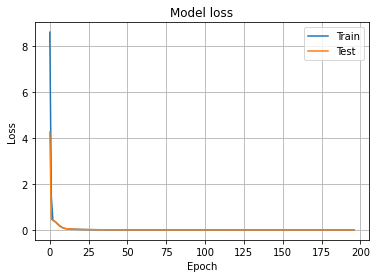

In [5]:

import matplotlib.pyplot as plt

# evaluate model + print performance
score_valid = model.evaluate(x_valid, y_valid, verbose=0)
print('Validazione:')
print('loss test -->', score_valid)

score_target = model.evaluate(x_valid, y_target, verbose=0)
print('Andamento esatto:')
print('loss test -->', score_target)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


Si effettua un test della rete costruita.

In particolare è richiesta alla rete, forniti $200$ valori di ascissa, di restituire secondo il modello che si è costruita autonomamente nella fase di training, dei valori plausibili della funzione in codesti punti.\
Si confrontano i valori prodotti dalla rete con un tracciato della funzione analitica.

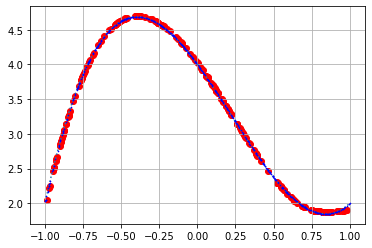

In [6]:

x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target, marker= 'x', mfc= 'blue', mec= 'blue', ms= 1, linestyle= ":" )
plt.grid(True)
plt.show()


#### - Test fuori dal dominio:

Si mostra ora un limite della rete.

Essendo stata allenata in $x \in [-1,1]$, e nel grafico precedente osservato il comportamento in tale intervallo, si prova ora ad uscire da tali limiti, osservando cosa la rete restituisce come predizione ad esempio nell'intervallo $[-1.5,1.5]$ oppure nell'intervallo $[-3,3]$.

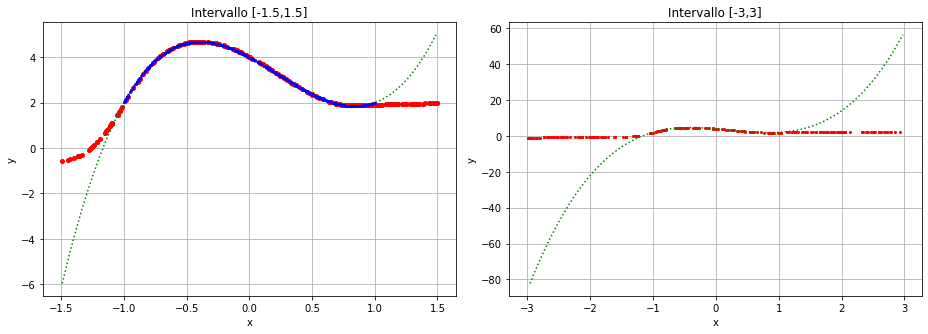

In [7]:

x_pre1 = np.random.uniform(-1.5, 1.5, 250)
y_pre1 = model.predict(x_pre1)

x_pre2 = np.random.uniform(-3, 3, 250)
y_pre2 = model.predict(x_pre2)

#traccia oltre dominio
x_extra1= np.random.uniform(-1.5, 1.5, 250)
x_extra1.sort()
y_extra1= a*x_extra1**3 + b*x_extra1**2 + c*x_extra1 + d

x_extra2= np.random.uniform(-3, 3, 250)
x_extra2.sort()
y_extra2= a*x_extra2**3 + b*x_extra2**2 + c*x_extra2 + d


fig, axs = plt.subplots(1, 2, figsize=(13, 4.75))

axs[0].plot ( x_pre1, y_pre1, marker= 'o', mfc= 'red', mec= 'red', ms= 4, linestyle= "none" )
axs[0].plot ( x_extra1, y_extra1, marker= 'x', mfc= 'green', mec= 'green', ms= 0, linestyle= ":", color= 'green' )
axs[0].plot( x_valid, y_target, marker= 'x', mfc= 'blue', mec= 'blue', ms= 2, linestyle= ":", color= 'blue' )
axs[0].set( xlabel= 'x', ylabel= 'y' )
axs[0].set_title( "Intervallo [-1.5,1.5]" )
axs[0].grid(True)

axs[1].plot ( x_pre2, y_pre2, marker= 'o', mfc= 'red', mec= 'red', ms= 2, linestyle= "none" )
axs[1].plot ( x_extra2, y_extra2, marker= 'x', mfc= 'green', mec= 'green', ms= 0, linestyle= ":", color= 'green' )
axs[1].set( xlabel= 'x', ylabel= 'y' )
axs[1].set_title( "Intervallo [-3,3]" )
axs[1].grid(True)

plt.tight_layout()
plt.show()


### -----------------------------------------------------------------------------------------------------------------------------------------------------------

# Reti neurali: funzioni in due variabili

Analogamente a quanto fatto in precedenza, si provi ad estendere il modello della rete al fine di ottenere un fit ragionevole della seguente funzione in due variabili:

$$ f(x,y)=sin(x^2+y^2) $$
con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [8]:

np.random.seed(0)
n_train= 5000
n_valid= 500
sigma= 0.2 #noise

x_train= np.zeros((n_train, 2))
x_valid= np.zeros((n_valid, 2))
y_target= np.zeros(n_valid)
y_train= np.zeros(n_train)
y_valid= np.zeros(n_valid)

for i in range(n_train):
    x_train[i,0]= np.random.uniform(-3/2, 3/2)
    x_train[i,1]= np.random.uniform(-3/2, 3/2)
    y_train[i]= np.random.normal(np.sin(x_train[i,0]**2 + x_train[i,1]**2), sigma)

for i in range(n_valid):
    x_valid[i,0] = np.random.uniform(-3/2, 3/2)
    x_valid[i,1] = np.random.uniform(-3/2, 3/2)
    y_target[i]= np.sin(x_valid[i,0]**2 + x_valid[i,1]**2)
    y_valid[i] = np.random.normal(np.sin(x_valid[i,0]**2 + x_valid[i,1]**2), sigma)
    

Sul modello della rete precedente si mantiene la struttura a doppio doppio layer, aumentando tuttavia il numero di neuroni a 36-12.\
Si mantengono inalterate le attivazioni che si sono viste ben performare in precedenza, ovvero per i layer più lunghi un'attivazione tipo $tanh$, mentre per quelli di sintesi posteriori un'attivazione $elu$. Si conclude sempre la rete con un neurone singolo per l'output. In input tuttavia la rete presenta un vettore bicomponente ( $input$_$shape$= $(2,)$ ), che rappresenta l'ascissa ed l'ordinata della funzione che si vuole modellizzare con la rete.

I parametri di ottimizzazione e la funzione obiettivo restano come in precedenza. E' assente la metrica per la valutazione delle performance.

In [9]:

model = tf.keras.Sequential()
model.add( Dense( 4, input_shape= (2,), activation= 'tanh') )
model.add( Dense( 36, activation= 'tanh') )
model.add( Dense( 12, activation= 'elu') )
model.add( Dense( 36, activation= 'tanh') )
model.add( Dense( 12, activation= 'elu') )
model.add( Dense( 1, activation= 'elu' ) )

model.compile( optimizer=optimizers.Adam(),
               loss=losses.mean_squared_error )

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 36)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_9 (Dense)              (None, 36)                468       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                444       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
____________________________________________________

Avendo a disposizione la medesima quantità di dati che in precedenza, si allena la rete con i medesimi parametri, ricordando in particolare:
- $shuffle$= $True$ ad ogni epoca;
- sistema di early stop;

In [10]:

batchsize= int(n_train/50)
nepochs= 5*batchsize
patience= int(3/100*nepochs)

history = model.fit( x= x_train, y= y_train, batch_size= batchsize, epochs= nepochs, shuffle= True,
          validation_data= ( x_valid, y_valid ),
          callbacks= [tf.keras.callbacks.EarlyStopping( monitor= "val_loss", min_delta= 0, patience= patience, 
                     verbose= 0, mode= "min" )]
                   )


Epoch 1/500
50/50 [==============================] - 0s 6ms/step - loss: 0.2625 - val_loss: 0.1848
Epoch 2/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1908 - val_loss: 0.1872
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1886 - val_loss: 0.1812
Epoch 4/500
50/50 [==============================] - 0s 4ms/step - loss: 0.1867 - val_loss: 0.1787
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1846 - val_loss: 0.1758
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1835 - val_loss: 0.1736
Epoch 7/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1811 - val_loss: 0.1704
Epoch 8/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1773 - val_loss: 0.1678
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1734 - val_loss: 0.1630
Epoch 10/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1661 - val_loss: 0.1549
Epoch 11/

Epoch 83/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.0443
Epoch 84/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0469 - val_loss: 0.0463
Epoch 85/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.0462
Epoch 86/500
50/50 [==============================] - 0s 2ms/step - loss: 0.0468 - val_loss: 0.0482


Si produce un grafico che valuti l'andamento della funzione obiettivo nelle epoche effettivamente allenate.

Validation:
test loss --> 0.04815300926566124
Exact curve:
test loss --> 0.008985336869955063


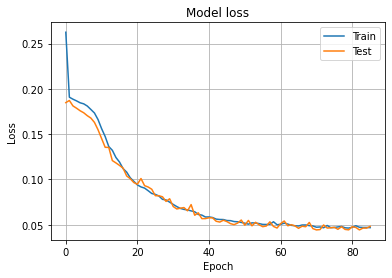

In [11]:
# evaluate model + print performance
score = model.evaluate(x_valid, y_valid, batch_size=350, verbose=0)
print('Validation:')
print('test loss -->', score)

score = model.evaluate(x_valid, y_target, batch_size=350, verbose=0)
print('Exact curve:')
print('test loss -->', score)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()


Si chiede ora una previsione alla rete allenata e si valuta tale previsione in 2D e 3D secondo l'andamento della funzione $f(x,y)$ analitica oppure la sua proiezione su un solo asse x o y.

In [12]:

x_pred= np.zeros((500,2))
for i in range(500):
    x_pred[i,0]= np.random.uniform(-3/2, 3/2)
    x_pred[i,1]= np.random.uniform(-3/2, 3/2)
y_pred = model.predict(x_pred)


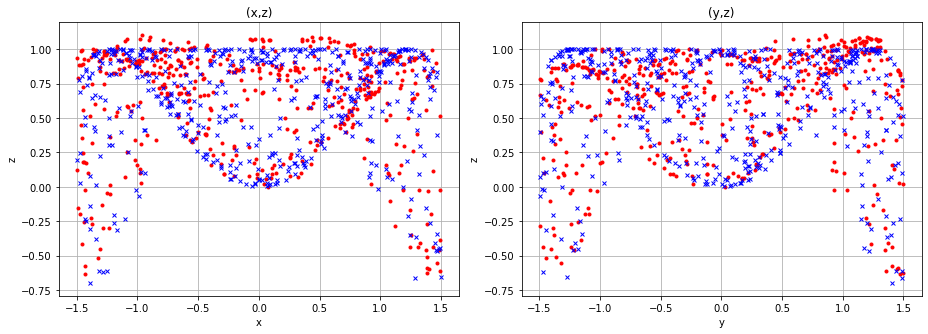

In [13]:

fig, axs = plt.subplots(1, 2, figsize=(13, 4.75))

axs[0].plot ( np.squeeze(x_pred[:,:1]), np.squeeze(y_pred), marker= 'o', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none" )
axs[0].plot ( np.squeeze(x_valid[:,:1]), np.squeeze(y_target), marker= 'x', mfc= 'blue', mec= 'blue', 
              ms= 4, linestyle= "none", color= 'blue' )
axs[0].set( xlabel= 'x', ylabel= 'z' )
axs[0].set_title( "(x,z)" )
axs[0].grid(True)

axs[1].plot ( np.squeeze(x_pred[:,1:2]), np.squeeze(y_pred), marker= 'o', mfc= 'red', mec= 'red', ms= 3, 
              linestyle= "none" )
axs[1].plot ( np.squeeze(x_valid[:,1:2]), np.squeeze(y_target), marker= 'x', mfc= 'blue', mec= 'blue', 
              ms= 4, linestyle= "none", color= 'blue' )
axs[1].set( xlabel= 'y', ylabel= 'z' )
axs[1].set_title( "(y,z)" )
axs[1].grid(True)

plt.tight_layout()
plt.show()


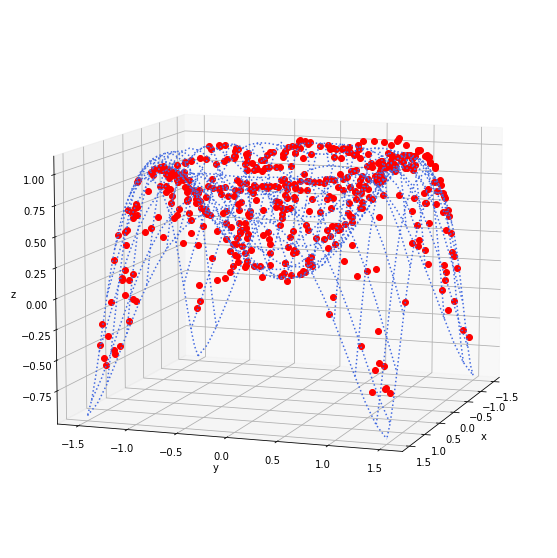

NOTA: si esegua più volte la seguente cella al fine di visualizzare il grafico 3D in diversi orientamenti.


In [14]:

def f(x, y):
   return np.sin(x ** 2 + y ** 2)


#wireframe riferimento:
x_wf = np.linspace(-1.5, 1.5, 30)
y_wf = np.linspace(-1.5, 1.5, 30)

X_wf, Y_wf = np.meshgrid(x_wf, y_wf)
Z_wf = f(X_wf, Y_wf)


fig= plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
ax.plot_wireframe( X_wf, Y_wf, Z_wf, rstride=2, cstride=2, color= "royalblue", 
                   linestyle= ":" )
ax.plot( np.squeeze(x_pred[:,:1]), np.squeeze(x_pred[:,1:2]), np.squeeze(y_pred), marker= 'o', mfc= 'red', 
         mec= 'red', ms= 6, linestyle= "none" )
ax.set_title('')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.elev= np.random.randint(5,30)
ax.azim= np.random.randint(5,30)
ax.grid(True)
plt.show()

print( "NOTA: si esegua più volte la seguente cella al fine di visualizzare il grafico 3D in diversi orientamenti." )

## - Osservazioni:

L'obiettivo di questi reti evidentemente è quello di, senza eccedere in dimensioni, ottenere dei modelli validi per la predizione statistica delle funzioni desiderate.\
Tali modelli si sono inoltre mostrati avere, come atteso, dei limiti in particolare riguardanti la tipologia di dati di training utilizzati, tuttavia se utilizzati correttamente nelle giuste porzioni di spazio, possono già rappresentare un buon metodo per offrire varietà statistica sui dati desiderati; infatti, avendo implementato nella fase di training un certo rumore ($sigma$) ai dati forniti, la rete ed il modello derivato (dato che la prima non è eccessiva in dimensioni e il secondo non ha eccessivamente appreso) producono previsioni compatibili con le funzioni analitiche di riferimento, ma con un certo grado di varietà statistica casuale.